In [1]:
import matplotlib.pyplot as plt
from keras.layers import MaxPool2D, AvgPool2D, Dropout
from keras.layers import BatchNormalization

import warnings
warnings.filterwarnings('ignore')

from keras.datasets import cifar100

(X_egitim, y_egitim), (X_test, y_test) = cifar100.load_data()

print("Eğitim kümesi boyutu (X) :", X_egitim.shape)
print("Eğitim kümesi boyutu (y) :", y_egitim.shape)
print("Test kümesi boyutu (X)   :", X_test.shape)
print("Test kümesi boyutu (y)   :", y_test.shape)

Using TensorFlow backend.


Eğitim kümesi boyutu (X) : (50000, 32, 32, 3)
Eğitim kümesi boyutu (y) : (50000, 1)
Test kümesi boyutu (X)   : (10000, 32, 32, 3)
Test kümesi boyutu (y)   : (10000, 1)


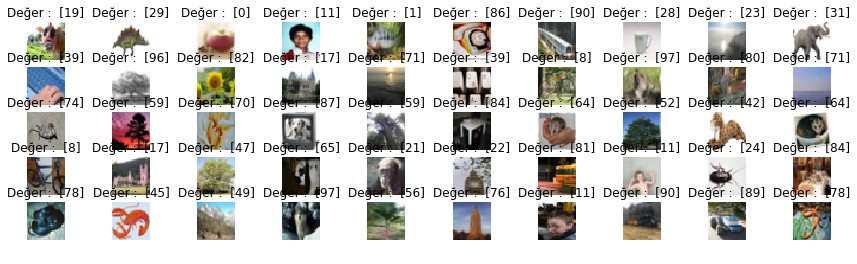

In [2]:
plt.figure(figsize=(15,4))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.imshow(X_egitim[i])
    plt.title("Değer :  {}".format(y_egitim[i]))
    plt.axis('off')
           
plt.show()

In [3]:
from keras.utils import to_categorical

y_egitim_kategorik = to_categorical(y_egitim, 100)
y_test_kategorik = to_categorical(y_test, 100)

In [4]:
img_satır = X_egitim.shape[1]
img_sutun = X_egitim.shape[2]
kanal_sayisi = X_egitim.shape[3]
print(img_satır, img_sutun, kanal_sayisi)

32 32 3


In [5]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
model = Sequential()
model.add(Conv2D(filters = 16, kernel_size=5, activation='relu', strides = (2,2), 
               input_shape=(img_satır, img_sutun,kanal_sayisi)))
model.add(Flatten())
model.add(Dense(100, activation='softmax'))
                 
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 14, 14, 16)        1216      
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               313700    
Total params: 314,916
Trainable params: 314,916
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.fit(X_egitim, y_egitim_kategorik, 
          validation_split=0.2, 
          epochs=3, batch_size=32)

Train on 40000 samples, validate on 10000 samples
Epoch 1/3
40000/40000 [==============================] - 16s 399us/step - loss: 5.3392 - accuracy: 0.0117 - val_loss: 4.6069 - val_accuracy: 0.0117
Epoch 2/3
40000/40000 [==============================] - 16s 389us/step - loss: 4.5552 - accuracy: 0.0206 - val_loss: 4.6347 - val_accuracy: 0.0155
Epoch 3/3
40000/40000 [==============================] - 16s 410us/step - loss: 4.4777 - accuracy: 0.0355 - val_loss: 4.7784 - val_accuracy: 0.0168


In [7]:
dogruluk_egitim = model.evaluate(X_egitim, y_egitim_kategorik)[1]
dogruluk_test = model.evaluate(X_test, y_test_kategorik)[1]

print("\nEğitim kümesi doğruluk değeri : {:.3f}".format(dogruluk_egitim))
print("Test kümesi doğruluk değeri   : {:.3f}".format(dogruluk_test))

10000/10000 [==============================] - 1s 114us/step

Eğitim kümesi doğruluk değeri : 0.051
Test kümesi doğruluk değeri   : 0.017


In [12]:


model = Sequential()
model.add(Conv2D(16, kernel_size=3, activation='relu', 
               input_shape=(img_satır, img_sutun,kanal_sayisi)))
model.add(BatchNormalization())
model.add(MaxPool2D(2))
model.add(Dropout(0.50))
model.add(Flatten())
model.add(Dense(100, activation='softmax'))
                 
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 16)        448       
_________________________________________________________________
batch_normalization_2 (Batch (None, 30, 30, 16)        64        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 16)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 3600)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               360100    
Total params: 360,612
Trainable params: 360,580
Non-trainable params: 32
_______________________________________________

In [13]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.fit(X_egitim, y_egitim_kategorik, 
          validation_split=0.1, 
          epochs=10, batch_size=32)

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
45000/45000 [==============================] - 50s 1ms/step - loss: 4.1283 - accuracy: 0.1363 - val_loss: 3.4064 - val_accuracy: 0.2054
Epoch 2/10
45000/45000 [==============================] - 46s 1ms/step - loss: 3.1983 - accuracy: 0.2438 - val_loss: 3.1795 - val_accuracy: 0.2554
Epoch 3/10
45000/45000 [==============================] - 48s 1ms/step - loss: 2.9581 - accuracy: 0.2883 - val_loss: 3.0429 - val_accuracy: 0.2902
Epoch 4/10
45000/45000 [==============================] - 48s 1ms/step - loss: 2.7975 - accuracy: 0.3180 - val_loss: 3.0002 - val_accuracy: 0.2908
Epoch 5/10
45000/45000 [==============================] - 45s 992us/step - loss: 2.6780 - accuracy: 0.3456 - val_loss: 2.9251 - val_accuracy: 0.3090
Epoch 6/10
45000/45000 [==============================] - 45s 1ms/step - loss: 2.6044 - accuracy: 0.3595 - val_loss: 2.8921 - val_accuracy: 0.3176
Epoch 7/10
45000/45000 [==============================] - 47s 1ms/s

In [14]:
dogruluk_egitim = model.evaluate(X_egitim, y_egitim_kategorik)[1]
dogruluk_test = model.evaluate(X_test, y_test_kategorik)[1]

print("\nEğitim kümesi doğruluk değeri : {:.3f}".format(dogruluk_egitim))
print("Test kümesi doğruluk değeri   : {:.3f}".format(dogruluk_test))

10000/10000 [==============================] - 3s 274us/step

Eğitim kümesi doğruluk değeri : 0.491
Test kümesi doğruluk değeri   : 0.320


In [15]:
model = Sequential()
model.add(Conv2D(filters = 16, kernel_size=3, activation='relu', 
                 input_shape=(img_satır, img_sutun,kanal_sayisi)))
model.add(BatchNormalization())
model.add(Conv2D(filters = 16, kernel_size=3,strides=(1, 1), activation='relu', 
                 input_shape=(img_satır, img_sutun,kanal_sayisi)))
model.add(BatchNormalization())
model.add(MaxPool2D(2))
model.add(Dropout(0.50))
    
model.add(Flatten())
model.add(Dense(100, activation='softmax'))
                 
model.summary()
    
model.compile(optimizer='adam', 
           loss='categorical_crossentropy', 
           metrics=['accuracy'])

model.fit(X_egitim, y_egitim_kategorik, 
          validation_split=0.1, 
          epochs=10, batch_size=32)
dogruluk_egitim = model.evaluate(X_egitim, y_egitim_kategorik)[1]
dogruluk_test = model.evaluate(X_test, y_test_kategorik)[1]

print("\nEğitim kümesi doğruluk değeri : {:.3f}".format(dogruluk_egitim))
print("Test kümesi doğruluk değeri   : {:.3f}".format(dogruluk_test))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 16)        448       
_________________________________________________________________
batch_normalization_3 (Batch (None, 30, 30, 16)        64        
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 16)        2320      
_________________________________________________________________
batch_normalization_4 (Batch (None, 28, 28, 16)        64        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 16)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 3136)             

In [22]:
model = Sequential()
model.add(Conv2D(filters = 16, kernel_size=3, activation='relu', 
                 input_shape=(img_satır, img_sutun,kanal_sayisi)))
model.add(BatchNormalization())
model.add(Conv2D(filters = 16, kernel_size=3,strides=(1, 1), activation='relu', 
                 input_shape=(img_satır, img_sutun,kanal_sayisi)))
model.add(BatchNormalization())
model.add(MaxPool2D(2))
    
model.add(Flatten())
model.add(Dense(100, activation='softmax'))
                 
model.summary()
    
model.compile(optimizer='adam', 
           loss='categorical_crossentropy', 
           metrics=['accuracy'])

model.fit(X_egitim, y_egitim_kategorik, 
          validation_split=0.1, 
          epochs=10, batch_size=32)
dogruluk_egitim = model.evaluate(X_egitim, y_egitim_kategorik)[1]
dogruluk_test = model.evaluate(X_test, y_test_kategorik)[1]

print("\nEğitim kümesi doğruluk değeri : {:.3f}".format(dogruluk_egitim))
print("Test kümesi doğruluk değeri   : {:.3f}".format(dogruluk_test))

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 30, 30, 16)        448       
_________________________________________________________________
batch_normalization_18 (Batc (None, 30, 30, 16)        64        
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 28, 28, 16)        2320      
_________________________________________________________________
batch_normalization_19 (Batc (None, 28, 28, 16)        64        
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 100)             

In [26]:

model = Sequential()
model.add(Conv2D(filters = 16, kernel_size=3, activation='relu', 
                 input_shape=(img_satır, img_sutun,kanal_sayisi)))
model.add(BatchNormalization())
model.add(Conv2D(filters = 16, kernel_size=3,strides=(1, 1), activation='relu', 
                 input_shape=(img_satır, img_sutun,kanal_sayisi)))
model.add(BatchNormalization())
model.add(MaxPool2D(2))
    
model.add(Flatten())
model.add(Dense(100, activation='softmax'))
                 
model.summary()
    
model.compile(optimizer='adam', 
           loss='categorical_crossentropy', 
           metrics=['accuracy'])

model.fit(X_egitim, y_egitim_kategorik, 
          validation_split=0.1, 
          epochs=20, batch_size=32)
dogruluk_egitim = model.evaluate(X_egitim, y_egitim_kategorik)[1]
dogruluk_test = model.evaluate(X_test, y_test_kategorik)[1]

print("\nEğitim kümesi doğruluk değeri : {:.3f}".format(dogruluk_egitim))
print("Test kümesi doğruluk değeri   : {:.3f}".format(dogruluk_test))


Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 30, 30, 16)        448       
_________________________________________________________________
batch_normalization_26 (Batc (None, 30, 30, 16)        64        
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 28, 28, 16)        2320      
_________________________________________________________________
batch_normalization_27 (Batc (None, 28, 28, 16)        64        
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 100)             

In [ ]:

model = Sequential()
model.add(Conv2D(filters = 16, kernel_size=3, activation='relu', 
                 input_shape=(img_satır, img_sutun,kanal_sayisi)))
model.add(BatchNormalization())
model.add(Conv2D(filters = 16, kernel_size=3,strides=(1, 1), activation='relu', 
                 input_shape=(img_satır, img_sutun,kanal_sayisi)))
model.add(BatchNormalization())
model.add(MaxPool2D(2))
    
model.add(Flatten())
model.add(Dense(100, activation='softmax'))
                 
model.summary()
    
model.compile(optimizer='adam', 
           loss='categorical_crossentropy', 
           metrics=['accuracy'])

model.fit(X_egitim, y_egitim_kategorik, 
          validation_split=0.1, 
          epochs=21, batch_size=32)
dogruluk_egitim = model.evaluate(X_egitim, y_egitim_kategorik)[1]
dogruluk_test = model.evaluate(X_test, y_test_kategorik)[1]

print("\nEğitim kümesi doğruluk değeri : {:.3f}".format(dogruluk_egitim))
print("Test kümesi doğruluk değeri   : {:.3f}".format(dogruluk_test))


Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 30, 30, 16)        448       
_________________________________________________________________
batch_normalization_36 (Batc (None, 30, 30, 16)        64        
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 28, 28, 16)        2320      
_________________________________________________________________
batch_normalization_37 (Batc (None, 28, 28, 16)        64        
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_19 (Dense)             (None, 100)             